<a href="https://colab.research.google.com/github/nileshmalode11/K-Means_Clustring/blob/main/k_means_clustring_iris_data_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-k-means/IRIS.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/kaggle/input/iris-k-means/IRIS.csv")

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

# **Droping Specis Feature**

In [ ]:
x = df.drop(["species"],axis=1)

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# **EDA on Iris Datset**

In [ ]:
import plotly.express as px
df["e"] = df["sepal_width"]/100

fig=px.scatter(df,x="sepal_width",y="sepal_length",color="species",marginal_x="box", trendline="ols", template="simple_white",error_x="e", error_y="e")
fig.show()


In [ ]:
fig = px.bar(df,x="species",barmode="group",pattern_shape_sequence=["x"])
fig.show()

In [ ]:
fig = px.scatter_matrix(df, dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"], color="species")
fig.show()

In [ ]:
fig=px.histogram(df,x="sepal_width",color="species")
fig.show()

In [ ]:
fig=px.histogram(df,x="sepal_length",color="species")
fig.show()

In [ ]:
fig=px.histogram(df,x="petal_width",color="species")
fig.show()

In [ ]:
fig=px.histogram(df,x="petal_length",color="species")
fig.show()

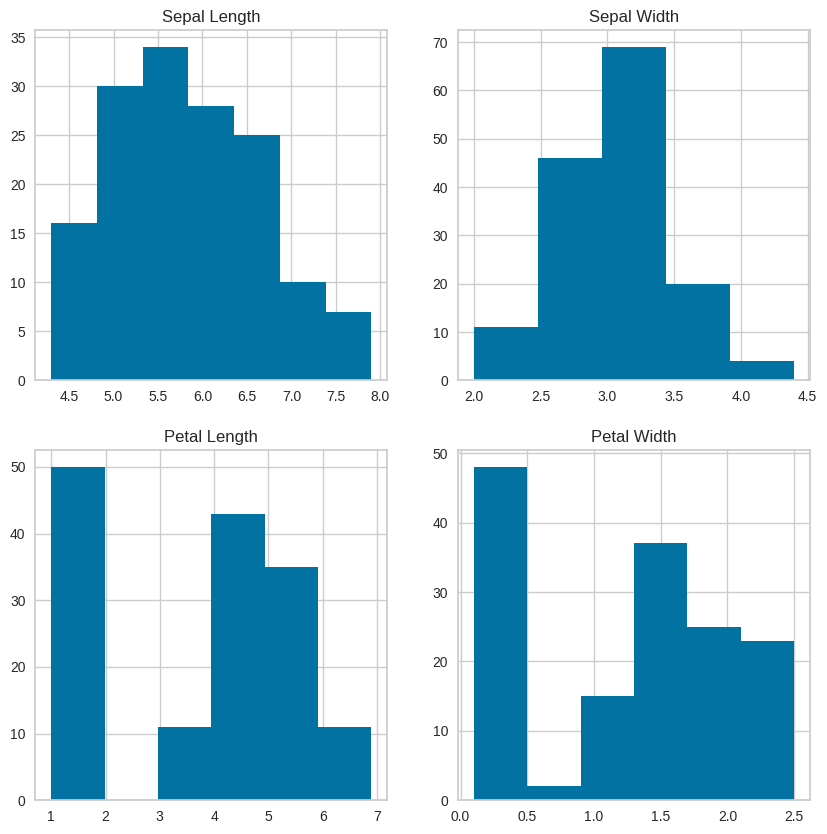

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(10,10))

axes[0,0].set_title("Sepal Length")
axes[0,0].hist(df['sepal_length'], bins=7)

axes[0,1].set_title("Sepal Width")
axes[0,1].hist(df['sepal_width'], bins=5);

axes[1,0].set_title("Petal Length")
axes[1,0].hist(df['petal_length'], bins=6);

axes[1,1].set_title("Petal Width")
axes[1,1].hist(df['petal_width'], bins=6);

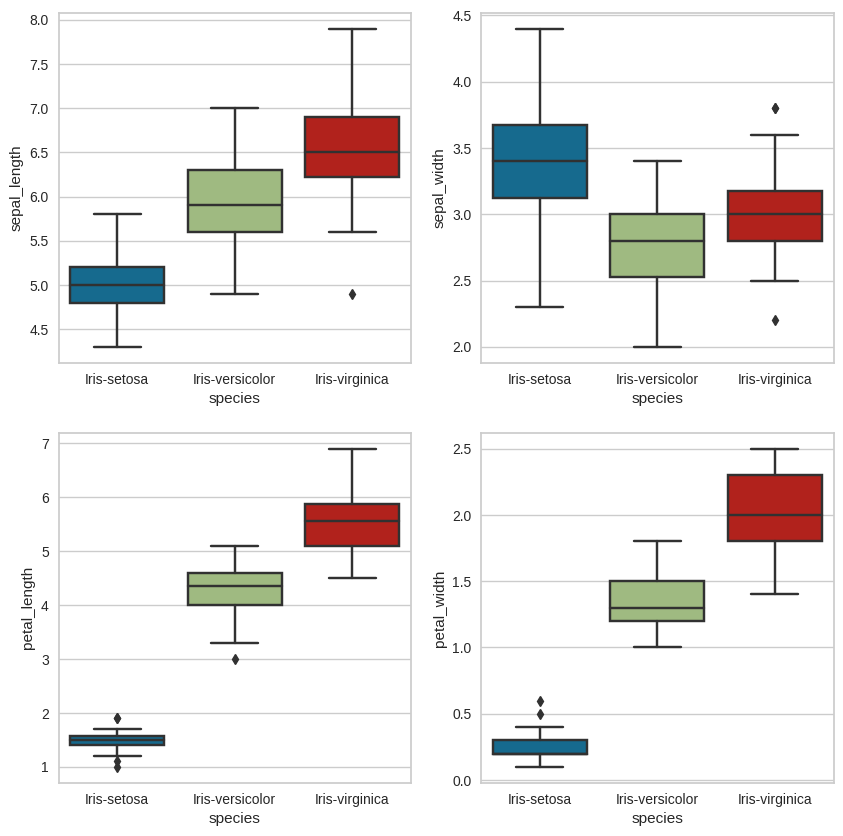

In [ ]:
def graph(y):
    sns.boxplot(x="species", y=y, data=df)

plt.figure(figsize=(10,10))

# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')

plt.subplot(222)
graph('sepal_width')

plt.subplot(223)
graph('petal_length')

plt.subplot(224)
graph('petal_width')

plt.show()

<Axes: xlabel='sepal_width'>

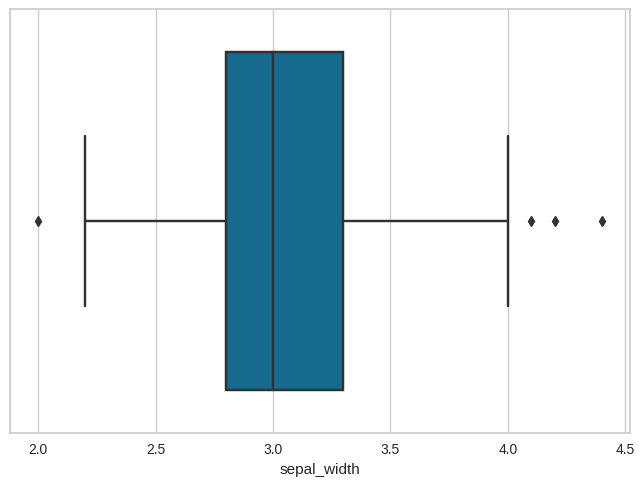

In [ ]:
sns.boxplot(x="sepal_width",data=df)

# **Implimentation K-Means, Agglomerative custring,KMedians**

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using the elbow method to determine the optimal number of clusters for k-means clustering
**

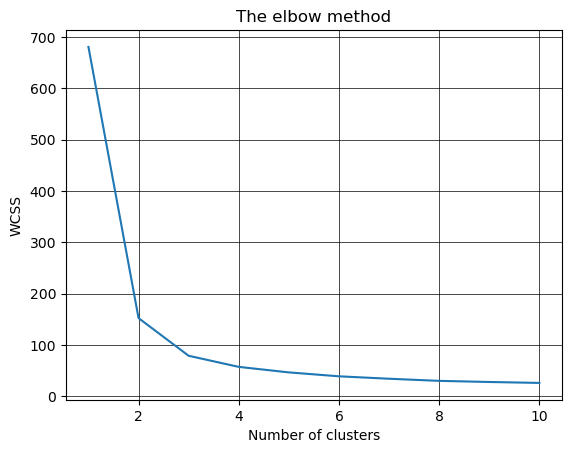

In [ ]:
plt.grid(True, linewidth=0.5, color='black', linestyle='-')
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.37121805054590085


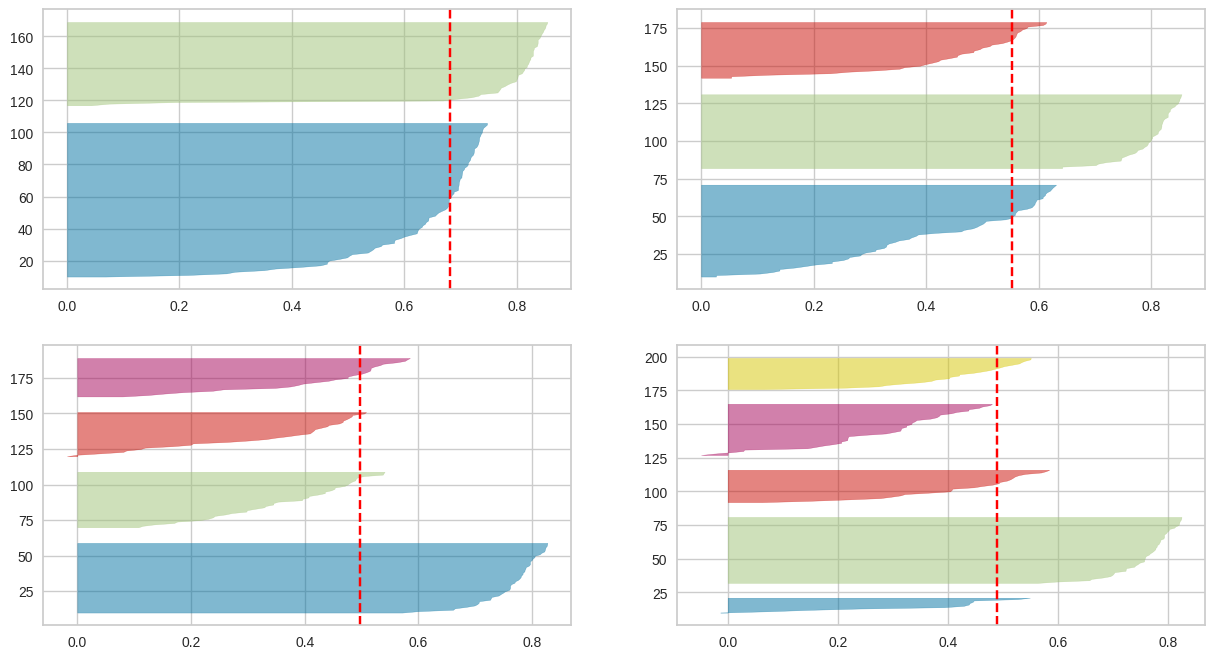

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]
for i in range_n_clusters:
    clusterer = KMeans(n_clusters=i, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", i,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5,]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

KMeans(max_iter=100, n_clusters=2, n_init=10, random_state=42)
KMeans(max_iter=100, n_clusters=3, n_init=10, random_state=42)
KMeans(max_iter=100, n_clusters=4, n_init=10, random_state=42)
KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=42)


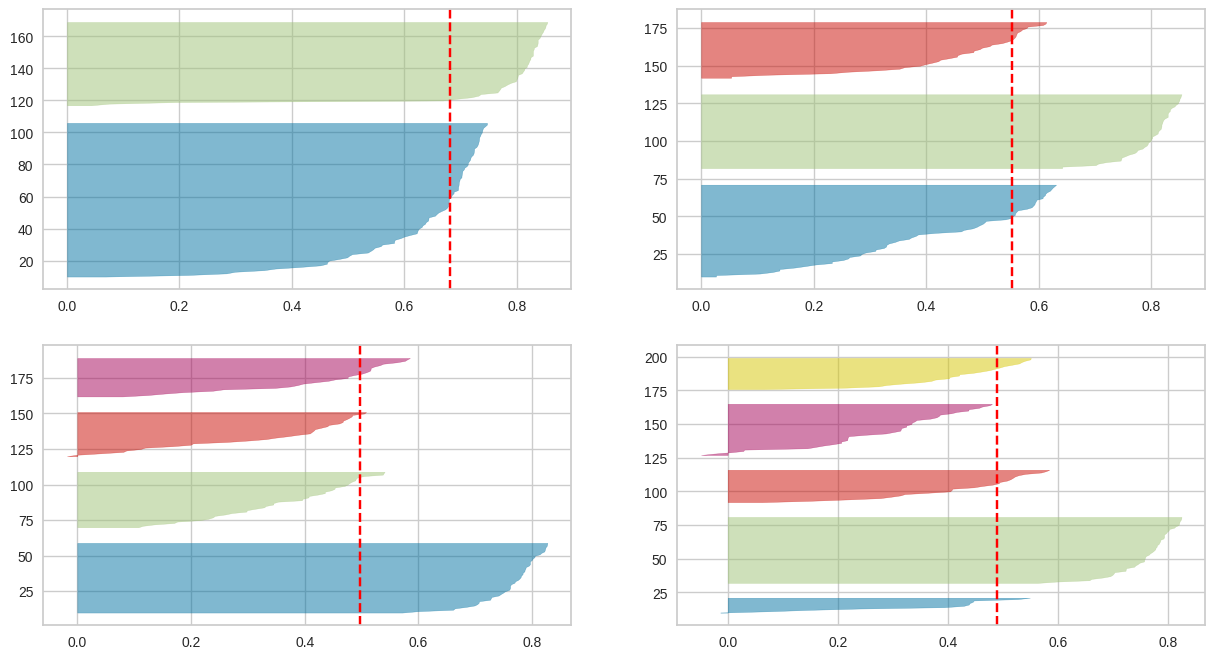

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    print(km)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

# **Implimentation K-Means**

# **Fit kMeans Model with 2 cluster**

In [ ]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)

KMeans(n_clusters=2, n_init=10, random_state=0)

In [ ]:
y_kmeans=kmeans.predict(x)

In [ ]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
y = x.values

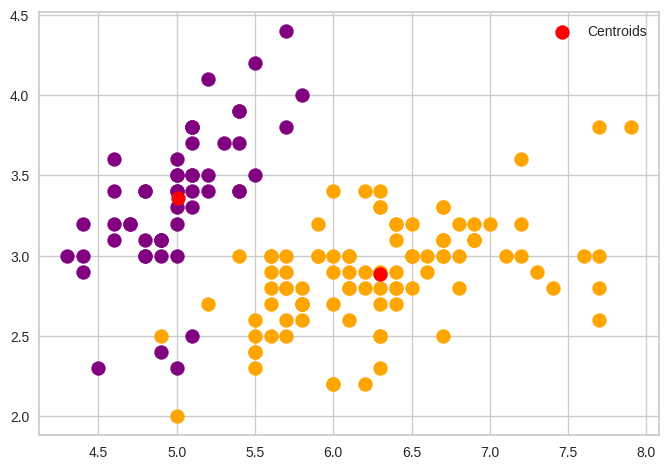

In [ ]:
#Visualising the clusters
plt.scatter(y[y_kmeans == 0, 0], y[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(y[y_kmeans == 1, 0], y[y_kmeans == 1, 1], s = 100, c = 'orange')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# **Fit kMeans Model with 3 cluster**

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
kmeans.fit(x)
y_kmeans1=kmeans.predict(x)

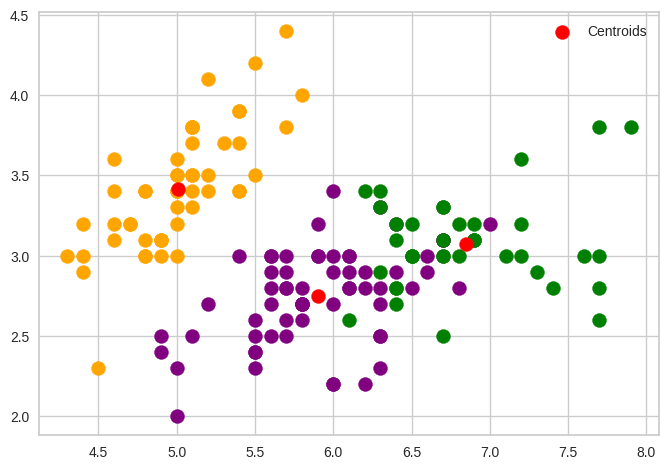

In [ ]:
#Visualising the clusters
plt.scatter(y[y_kmeans1 == 0, 0], y[y_kmeans1 == 0, 1], s = 100, c = 'purple')
plt.scatter(y[y_kmeans1 == 1, 0], y[y_kmeans1 == 1, 1], s = 100, c = 'orange')
plt.scatter(y[y_kmeans1 == 2, 0], y[y_kmeans1 == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# **implimentation of hirarchical clustring**

# **Agglomerative Clustring**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
model = model.fit(x)

In [ ]:

print(model.n_clusters_)
# Distances between clusters
distances = model.distances_
print(distances.min())
print(distances.max())

150
0.0
32.428012581717056


In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

In [ ]:
Z = hierarchy.linkage(model.children_, 'ward')

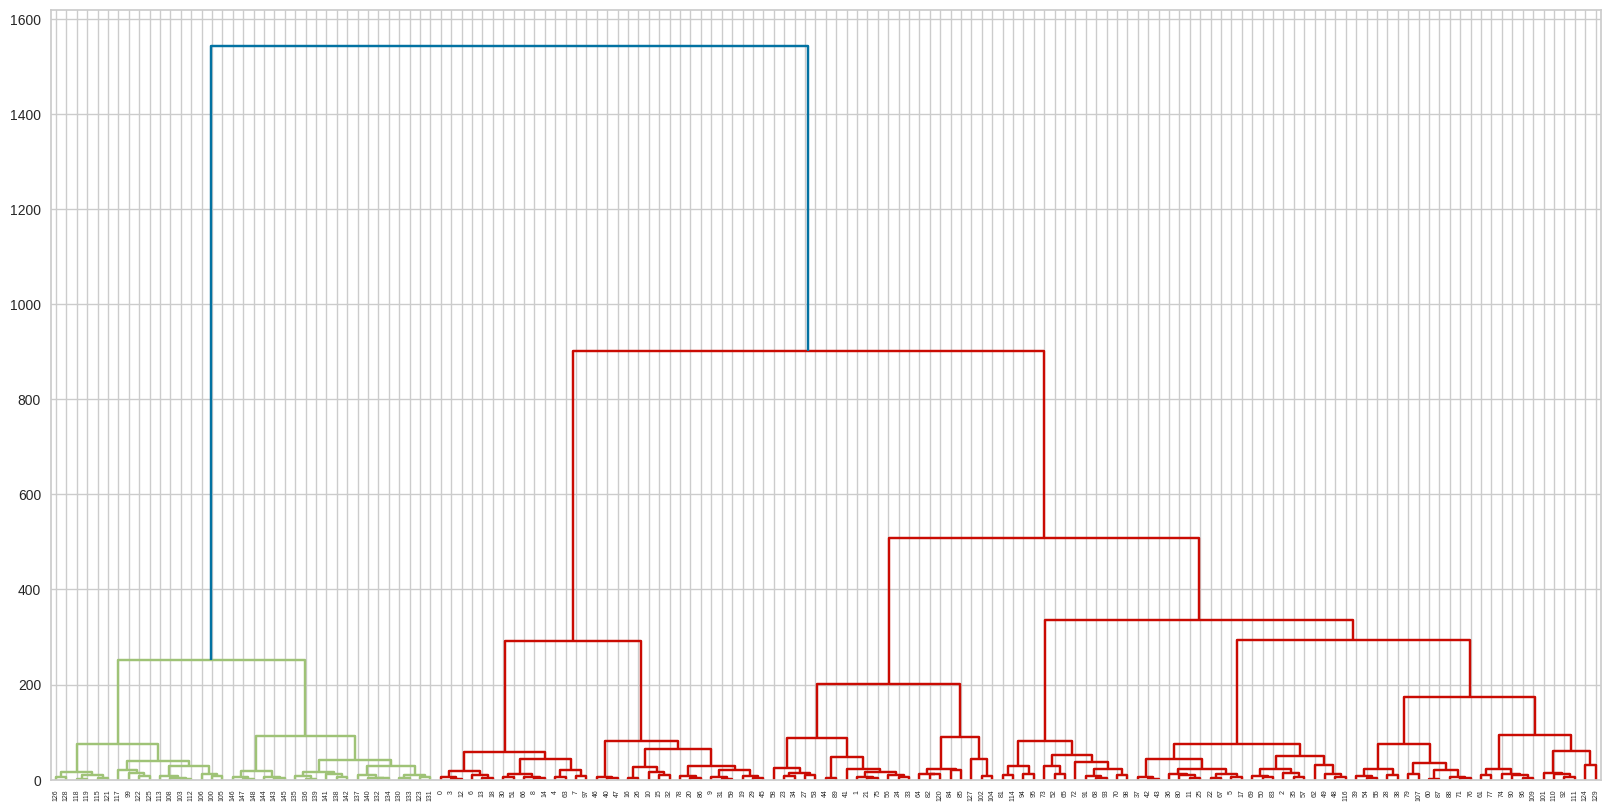

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [ ]:
model.distances_

array([ 0.        ,  0.        ,  0.        ,  0.1       ,  0.1       ,
        0.1       ,  0.1       ,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.14142136,  0.14142136,  0.14142136,  0.14142136,
        0.14142136,  0.17320508,  0.17320508,  0.17320508,  0.17320508,
        0.17320508,  0.17320508,  0.18257419,  0.18257419,  0.2       ,
        0.2       ,  0.2       ,  0.2       ,  0.21602469,  0.21602469,
        0.2236068 ,  0.2236068 ,  0.24494897,  0.24494897,  0.24494897,
        0.24494897,  0.24494897,  0.24494897,  0.24494897,  0.25819889,
        0.26457513,  0.26457513,  0.26457513,  0.26457513,  0.26457513,
        0.27080128,  0.28284271,  0.28982753,  0.29439203,  0.29439203,
        0.29439203,  0.29439203,  0.30550505,  0.31358146,  0.31622777,
        0.32145503,  0.33166248,  0.33166248,  0.33166248,  0.33665016,
        0.34156503,  0.34641016,  0.34641016,  0.34778209,  0.35

In [ ]:

model = AgglomerativeClustering(distance_threshold=10, n_clusters=None)
model = model.fit(x)
model.n_clusters_

3

# **implimentation KMedians**

In [ ]:
pip install pyclustering

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyclustering.cluster.kmedians import kmedians
from sklearn.cluster import kmeans_plusplus
from pandas import crosstab

ModuleNotFoundError: No module named 'pyclustering'

In [ ]:
[initial_centers, indexes] = kmeans_plusplus(X_scaled,n_clusters=3,random_state=9)

NameError: name 'kmeans_plusplus' is not defined

In [ ]:
kmedians_instance = kmedians(x,initial_centers);
kmedians_instance.process();
medians = np.array(kmedians_instance.get_medians());
kmedians_clusters = kmedians_instance.get_clusters()

kmedians_labels = np.zeros([X.shape[0]],dtype='int64')

plt.figure()
ax = plt.axes()
for i in range(3):
    kmedians_labels[kmeans_clusters[i]]=i
    ax.scatter(X_scaled[kmedians_clusters[i],0],X_scaled[kmedians_clusters[i],1],color=cor[i],alpha=0.5,zorder=2)
ax.scatter(medians[:,0],medians[:,1],c='k',marker='*',zorder=3);
ax.set_aspect('equal')
ax.grid(visible=True,zorder=1)
ax.set(title='K-medians clustering');

y_kmedians = np.zeros(150)
for i in range(3):
    y_kmedians[kmedians_clusters[i]]=i
crosstab(y,y_kmedians)